In [64]:
import numpy as np
import pandas as pd
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
from tqdm import *
from math import *
import operator
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
pd.__version__
import seaborn as sns

In [65]:
df= pd.read_csv("/Users/amitpatel/Downloads/Complaint_Analysis.csv")

/Users/amitpatel/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [66]:
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 23:59,1/1/2016 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 23:59,1/1/2016 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 23:59,1/1/2016 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 23:57,1/1/2016 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 23:56,1/1/2016 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,1/1/2015 0:04,1/1/2015 10:22,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,29608392,1/1/2015 0:04,1/1/2015 2:25,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,29607589,1/1/2015 0:01,1/1/2015 0:20,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,1/1/2015 0:01,1/1/2015 2:42,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"


# Cleaning and organising of dataset

In [67]:
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [68]:
df.drop(columns=['Agency', 'Agency Name', 'Incident Zip', 'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2', 
         'Intersection Street 1', 'Intersection Street 2', 'Landmark', 'Facility Type', 'Community Board', 
         'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough', 'School Name', 
         'School Number', 'School Region', 'School Code', 'School Phone Number', 'School Address', 'School City', 
         'School State', 'School Zip', 'School Not Found', 'School or Citywide Complaint', 'Vehicle Type', 
         'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 
         'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 'Latitude', 'Longitude', 
         'Location'], inplace=True)

In [69]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Complaint Type',
       'Descriptor', 'Location Type', 'Address Type', 'City', 'Status',
       'Due Date', 'Resolution Description', 'Resolution Action Updated Date',
       'Borough'],
      dtype='object')

<AxesSubplot:>

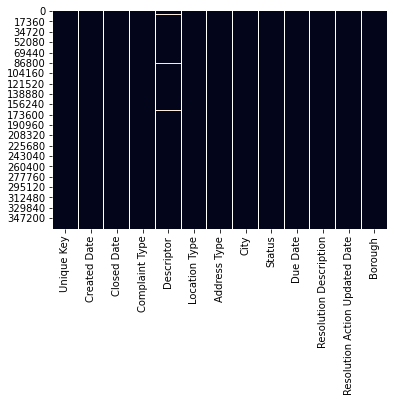

In [70]:
sns.heatmap(df.isnull(), cbar=False)

In [71]:
df.isnull().sum()

Unique Key                           0
Created Date                         0
Closed Date                       2381
Complaint Type                       0
Descriptor                        6501
Location Type                      133
Address Type                      3252
City                              2997
Status                               0
Due Date                             3
Resolution Description               0
Resolution Action Updated Date    2402
Borough                              0
dtype: int64

In [72]:
df.dropna(subset=['Descriptor'],inplace=True)
df.dropna(subset=['Closed Date'],inplace=True)
df.dropna(subset=['Location Type'],inplace=True)
df.dropna(subset=['Address Type'],inplace=True)
df.dropna(subset=['City'],inplace=True)
df.dropna(subset=['Resolution Action Updated Date'],inplace=True)

In [73]:
df.isnull().sum()

Unique Key                        0
Created Date                      0
Closed Date                       0
Complaint Type                    0
Descriptor                        0
Location Type                     0
Address Type                      0
City                              0
Status                            0
Due Date                          0
Resolution Description            0
Resolution Action Updated Date    0
Borough                           0
dtype: int64

<AxesSubplot:>

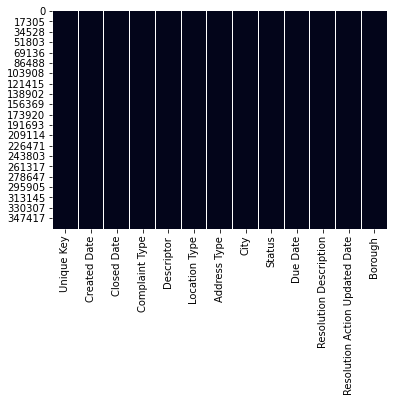

In [74]:
sns.heatmap(df.isnull(), cbar=False)

# Time Series Analysis

In [75]:
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])
df['Due Date'] = pd.to_datetime(df['Due Date'])
df['Resolution Action Updated Date'] = pd.to_datetime(df['Resolution Action Updated Date'])

In [76]:
x=df['Created Date'].value_counts()

In [77]:
x

2015-11-06 23:34:00    9
2015-09-26 22:01:00    9
2015-09-26 23:41:00    9
2015-06-06 22:23:00    9
2015-07-11 23:04:00    9
                      ..
2015-04-22 08:39:00    1
2015-04-20 21:46:00    1
2015-07-03 20:19:00    1
2015-11-29 16:30:00    1
2015-09-16 14:27:00    1
Name: Created Date, Length: 242006, dtype: int64

In [78]:
df['Hour'] = df['Created Date'].apply(lambda x: x.hour)
df['Month'] = df['Created Date'].apply(lambda x: x.month)
df['Day of Week'] = df['Created Date'].apply(lambda x: x.dayofweek)

In [79]:
df['Year'] = df['Created Date'].apply(lambda time: time.year)
df['Year'].value_counts()

2015    354628
Name: Year, dtype: int64

As all the data is from year 2015 therefore we can drop year

In [80]:
df.drop(columns='Year', inplace=True)
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Complaint Type',
       'Descriptor', 'Location Type', 'Address Type', 'City', 'Status',
       'Due Date', 'Resolution Description', 'Resolution Action Updated Date',
       'Borough', 'Hour', 'Month', 'Day of Week'],
      dtype='object')

In [81]:
day = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(day)

In [82]:
month = {1:'Jan',2:'Feb',3:'Mar',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov', 12:'Dec'}
df['Month'] = df['Month'].map(month)

In [83]:
x=df['Month']

In [84]:
from datetime import datetime

In [88]:
df['Month'].shape

(354628,)

In [89]:
df['Day of Week'].shape

(354628,)

In [90]:
df['Created Date'].shape

(354628,)

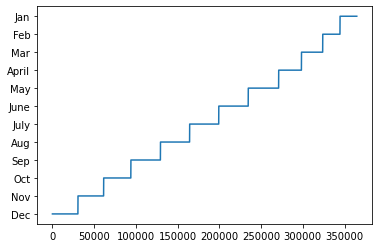

In [99]:
plt.plot(df['Month'])

<Figure size 864x432 with 0 Axes>

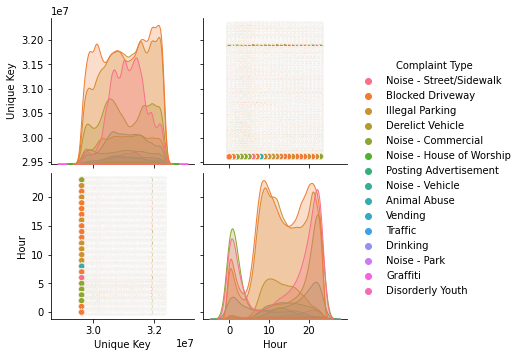

In [102]:
sns.pairplot(df,hue="Complaint Type")

/Users/amitpatel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


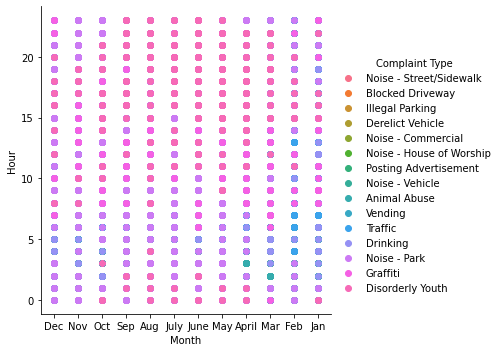

In [101]:
sns.FacetGrid(df,hue="Complaint Type",size=5).map(plt.scatter,"Month","Hour").add_legend();
plt.show()

<AxesSubplot:xlabel='Month', ylabel='count'>

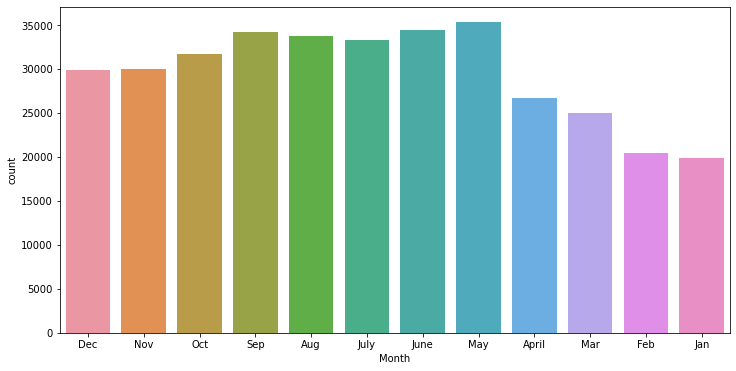

In [114]:
plt.figure(figsize=(12,6))
sns.countplot(df['Month'])

/Users/amitpatel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Complaint Type', ylabel='count'>

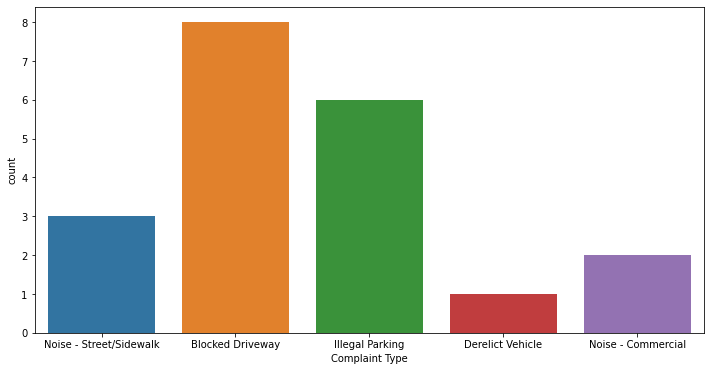

In [117]:
plt.figure(figsize=(12,6))
sns.countplot(df['Complaint Type'].head(20))

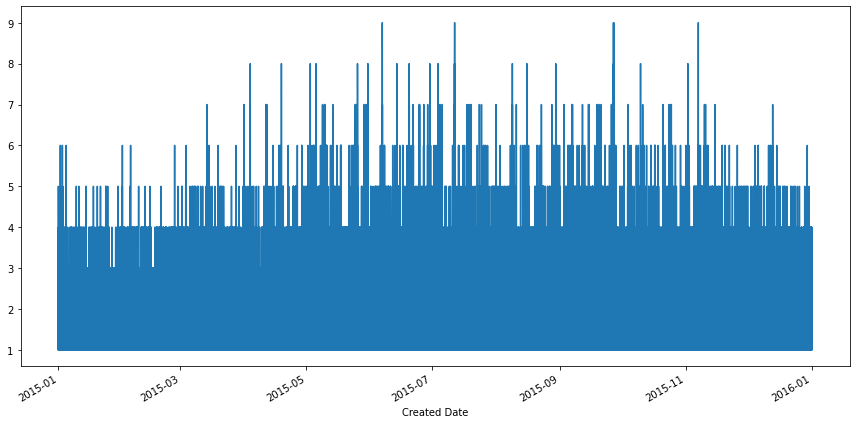

In [129]:
plt.figure(figsize=(12,6))
df.groupby(df['Created Date']).count()['Unique Key'].plot()
plt.tight_layout()

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

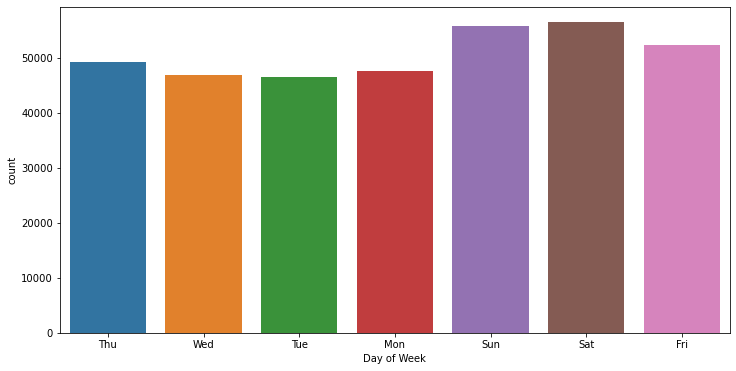

In [136]:
plt.figure(figsize=(12,6))
sns.countplot(df['Day of Week'])

<AxesSubplot:>

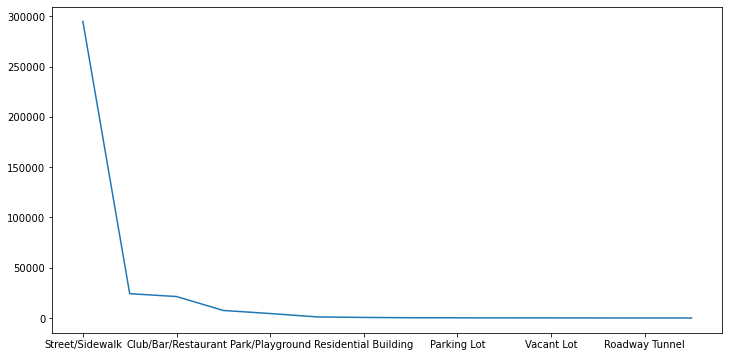

In [143]:
plt.figure(figsize=(12,6))
df["Location Type"].value_counts().plot()

In [157]:
y=df['Created Date'].value_counts()

/Users/amitpatel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Created Date', ylabel='Density'>

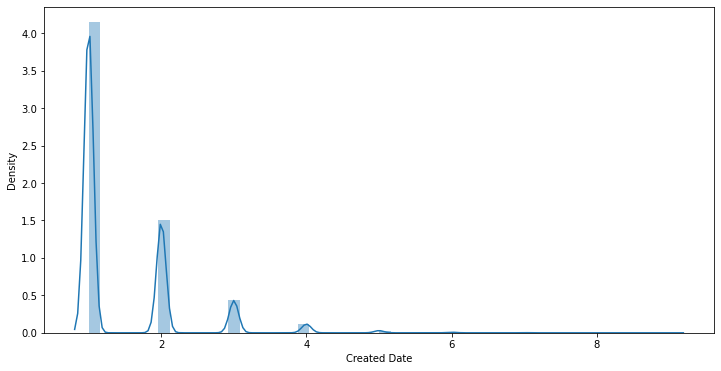

In [158]:
plt.figure(figsize=(12,6))
sns.distplot(y)

In [154]:
x=df["Closed Date"].value_counts()

/Users/amitpatel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Closed Date', ylabel='Density'>

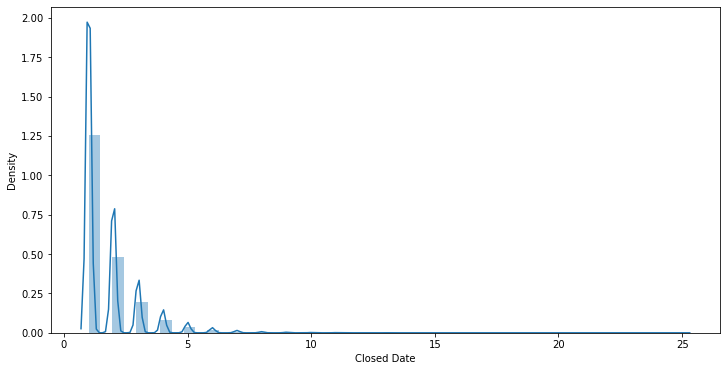

In [163]:
plt.figure(figsize=(12,6))
sns.distplot(x)

In [164]:
z=df['Due Date'].value_counts()

/Users/amitpatel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Due Date', ylabel='Density'>

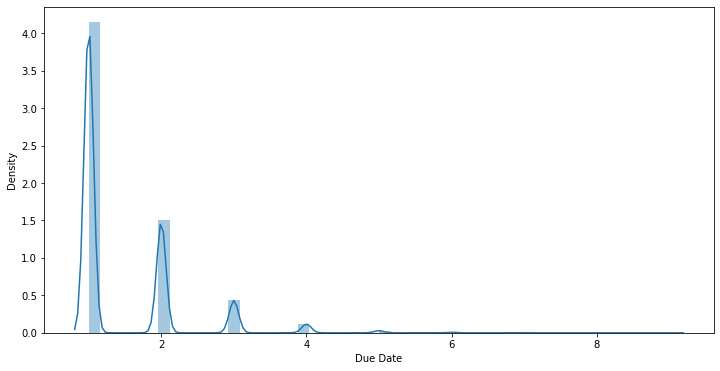

In [165]:
plt.figure(figsize=(12,6))
sns.distplot(z)